<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OverView about **Dataset**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/TimeSeries/Index2018.csv")

In [129]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


# Statistics methods

In [130]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [131]:
df.value_counts()

date        spx          dax       ftse         nikkei  
01/01/1996  615.930000   2260.69   3689.300000  19868.15    1
21/03/2013  1545.802976  7932.51   6388.550000  12635.69    1
21/05/1996  672.760000   2564.12   3789.400000  22091.74    1
21/04/2017  2348.694958  12048.57  7114.549511  18620.75    1
21/04/2016  2091.483661  10435.73  6381.438719  17363.62    1
                                                           ..
11/03/1994  466.440000   2101.89   3191.900000  20115.31    1
11/02/2016  1829.078346  8752.87   5536.971555  15713.39    1
11/02/2015  2068.531977  10752.11  6818.171624  17652.68    1
11/02/2014  1819.747843  9478.77   6672.658012  14718.34    1
31/12/2015  2043.936863  10743.01  6242.320781  19033.71    1
Length: 6269, dtype: int64

# Check Null Values

In [132]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting The Data

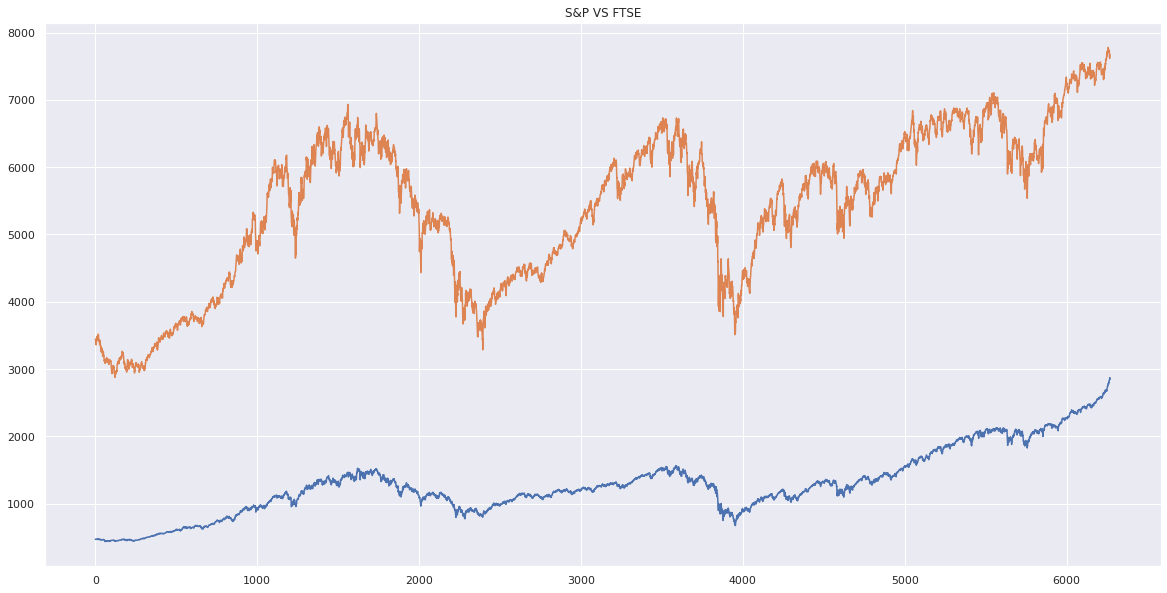

In [133]:
df.spx.plot(figsize=(20,10), title="S&P")
df.ftse.plot(figsize=(20,10) , title="FTSE")
plt.title("S&P VS FTSE")
plt.show()

We take a copy of the dataset because , we need to have the complete data load if we end up (removing) or altering data from the set

In [134]:
df_comp = df.copy()

# The QQ plot

In [135]:
import scipy.stats
import pylab

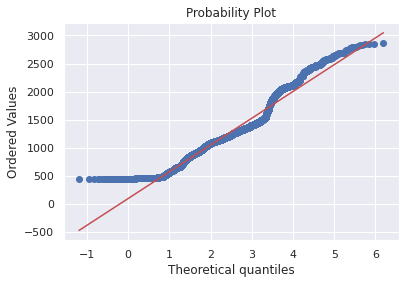

In [136]:
scipy.stats.probplot(df_comp.spx ,sparams=(2.5,), plot=pylab)
pylab.show()

1. Red Line : what data point should follow , if they are normally distributed

2. Theoretical quantiles : How many Standard Deviation is away from the mean these value are (in this case its not really the case since we have more values around 500 mark than we should)

# Length Of Time Period

we eant to analyze consecutive chunks of data and refer to the values assign to a specific day

All the "date" values are 1
Any single data holds a top value
the method randomly select one to display

In [137]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

# From Text To date

we get more detailed statistics about time period

In [138]:
df_comp.date = pd.to_datetime(df_comp.date , dayfirst=True)

In [139]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [140]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting The index

In [141]:
df_comp.set_index("date" , inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Once data becomes as index , we no longer save it values as seperate attributes in the data frame**

In [142]:
#df_comp.date.describe()

# Setting The Desired Frequency

In [143]:
df_comp = df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


Null values here represent the days was not recoded in dateset , and these days are Saturday , sunday , actually we generated new periods , which not have values associted with them.

# So , we better avoid adding such irrelevant time periods into our dataset

So ,  we use business days

In [144]:
df_comp = df_comp.asfreq('b')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


# Handling Missing Values

Setting the frequency to " business day" must have generated 8 date.
for which we have no date avaliable

In [145]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

There are underlying time variant patterns in the data , this approcha is appropriate only when data heavily fluctuate around the mean from the first to the last day

In [146]:
df_comp.spx=df_comp.spx.fillna(method="ffill")
df_comp.dax=df_comp.dax.fillna(method="bfill")
df_comp.ftse=df_comp.ftse.fillna(df.ftse.mean())
df_comp.nikkei=df_comp.nikkei.fillna(method="pad")

In [147]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Handling surplus data

drop some columns in DataSet and work with one by one

In [148]:
df_comp["market_value"] = df_comp.spx
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

# Splitting Data

Time Series data relies on keeping the chronological order of values

In [149]:
size = int(len(df_comp) * 0.8)
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [150]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [151]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


**Note** missing 6 , 7 day cuz it saturday and sunday

# End Of Pre Processing

# White Noise

In [152]:
wn = np.random.normal(loc = df_train.market_value.mean() , scale = df_train.market_value.std() , size=len(df_train))


In [153]:
df_train['wn'] = wn

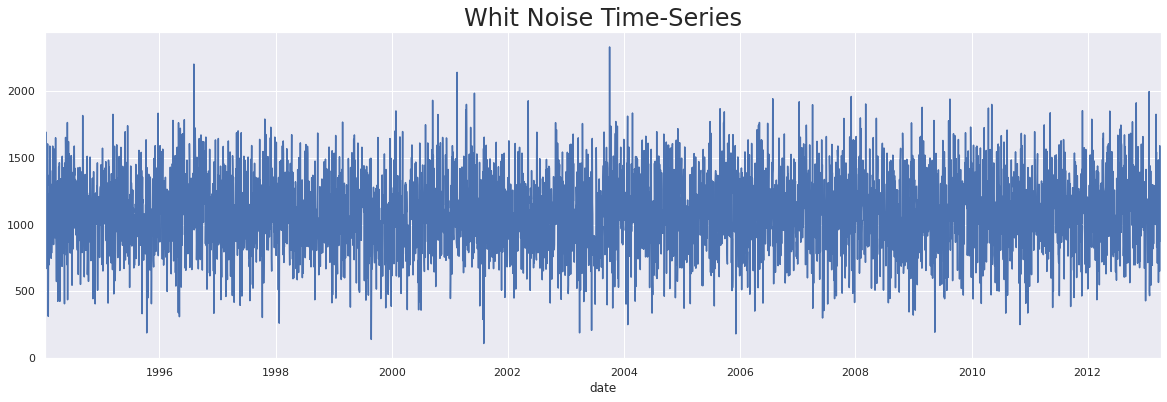

In [154]:
df_train.wn.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.show()

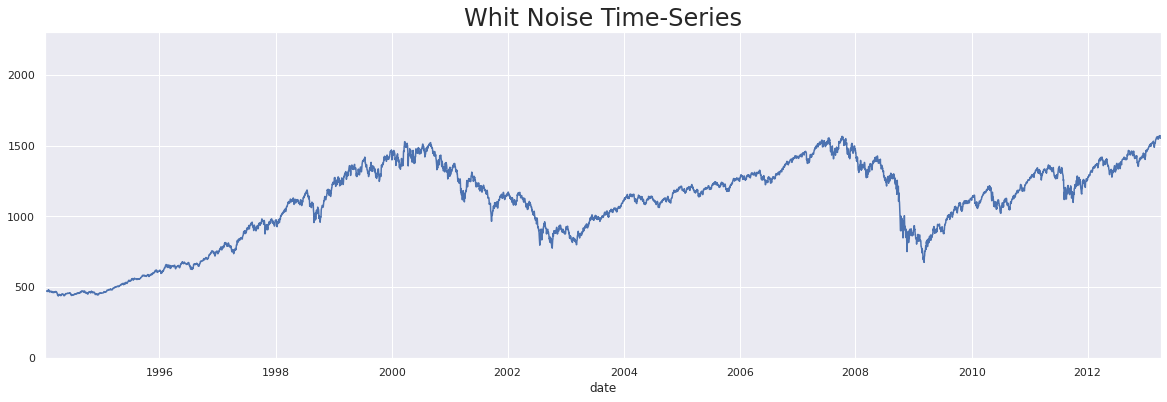

In [155]:
df_train.market_value.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.ylim(0,2300)
plt.show()

# Random Walk

In [156]:
rw = pd.read_csv('/content/drive/MyDrive/TimeSeries/RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [157]:
rw.date = pd.to_datetime(rw.date , dayfirst=True)
rw.set_index('date' , inplace=True)
rw = rw.asfreq('b')

In [158]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [159]:
df_train['rw'] = rw.price

In [160]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1012.012129,1122.139662
1994-01-10,475.27,1185.667766,1080.347860
1994-01-11,474.13,1425.795390,1082.095245
1994-01-12,474.17,1484.492153,1083.639265
1994-01-13,472.47,1475.674673,1067.146255


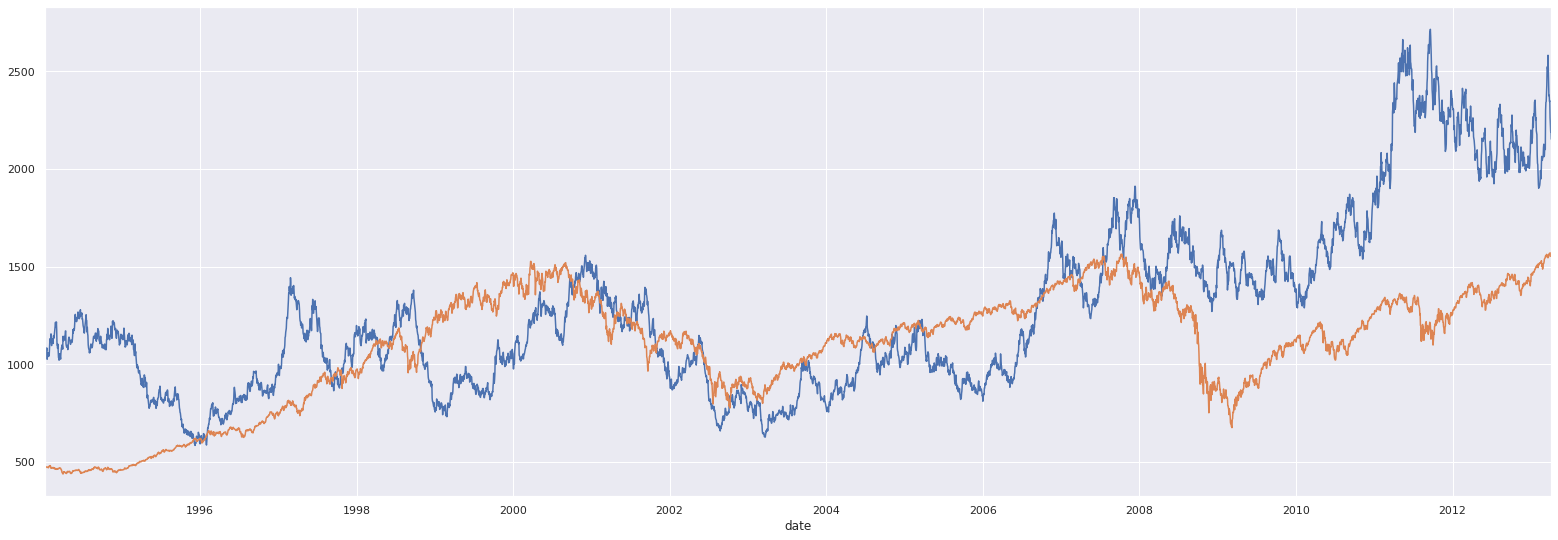

In [161]:
df_train.rw.plot(figsize=(27,9))
df_train.market_value.plot()
plt.show()

we can notice here that , small variation between consective time periods
2.  Cyclical increase and decrease in short period of Time

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

# ACF

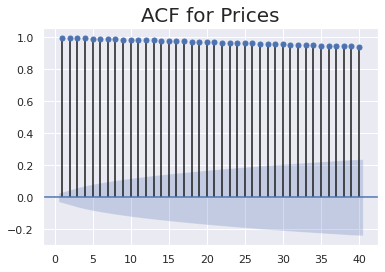

In [163]:
sgt.plot_acf(df_train.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

# PACF

In [164]:
import warnings
warnings.filterwarnings("ignore")

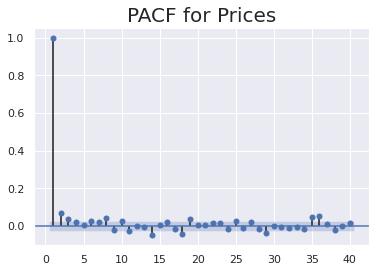

In [165]:
sgt.plot_pacf(df_train.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [166]:
model_ar = ARMA(df_train.market_value, order=(1,0))

In [167]:
results_ar = model_ar.fit()

In [168]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 16 Nov 2022   AIC                          40200.776
Time:                        00:04:27   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.2798    227.744      4.673      0.000     617.910    1510.650
ar.L1.market_value     0.9994      0.001   1911.623      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [169]:
model_ar_2 = ARMA(df_train.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.614
Method:                       css-mle   S.D. of innovations             13.206
Date:                Wed, 16 Nov 2022   AIC                          40179.227
Time:                        00:04:27   BIC                          40205.313
Sample:                    01-07-1994   HQIC                         40188.368
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1290.1449   1982.659      0.651      0.515   -2595.796    5176.085
ar.L1.market_value     0.9301      0.012     74.851      0.000       0.906       0.954
ar.L2.market_value     0.0695      0.012      5.564      0.000       0.045       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
AR.2          -14.3818           +0.0000j           14.3818            0.5000
-----------------------------------------------------------------------------
"""

In [170]:
model_ar_3 = ARMA(df_train.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 16 Nov 2022   AIC                          40174.695
Time:                        00:04:28   BIC                          40207.302
Sample:                    01-07-1994   HQIC                         40186.121
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.3478    263.761      4.013      0.000     541.386    1575.310
ar.L1.market_value     0.9276      0.014     68.497      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.990      0.047       0.001       0.075
ar.L3.market_value     0.0343      0.014      2.431      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0481           -5.2961j            5.3988           -0.2811
AR.3           -1.0481           +5.2961j            5.3988            0.2811
-----------------------------------------------------------------------------
"""

In [171]:
model_ar_4 = ARMA(df_train.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 16 Nov 2022   AIC                          40174.511
Time:                        00:04:30   BIC                          40213.639
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.8627    265.926      3.963      0.000     532.657    1575.068
ar.L1.market_value     0.9270      0.014     68.589      0.000       0.900       0.953
ar.L2.market_value     0.0368      0.019      1.953      0.051      -0.000       0.074
ar.L3.market_value     0.0148      0.019      0.771      0.441      -0.023       0.053
ar.L4.market_value     0.0209      0.014      1.478      0.139      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9299           -0.0000j            3.9299           -0.5000
AR.3            1.1090           -3.3115j            3.4923           -0.1986
AR.4            1.1090           +3.3115j            3.4923            0.1986
-----------------------------------------------------------------------------
"""

## LLR Test

In [172]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [173]:
LLR_test(model_ar_2, model_ar_3)

0.011

In [174]:
LLR_test(model_ar_3, model_ar_4)

0.139

In [175]:
model_ar_4 = ARMA(df_train.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 16 Nov 2022   AIC                          40174.511
Time:                        00:04:36   BIC                          40213.639
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.8627    265.926      3.963      0.000     532.657    1575.068
ar.L1.market_value     0.9270      0.014     68.589      0.000       0.900       0.953
ar.L2.market_value  

In [176]:
model_ar_5 = ARMA(df_train.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20081.504
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 16 Nov 2022   AIC                          40177.008
Time:                        00:04:40   BIC                          40222.658
Sample:                    01-07-1994   HQIC                         40193.004
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1314.4140        nan        nan        nan         nan         nan
ar.L1.market_value     0.9269      0.011     82.678      0.000       0.905       0.949
ar.L2.market_value  

In [177]:
model_ar_6 = ARMA(df_train.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -20079.653
Method:                       css-mle   S.D. of innovations             13.191
Date:                Wed, 16 Nov 2022   AIC                          40175.307
Time:                        00:04:45   BIC                          40227.478
Sample:                    01-07-1994   HQIC                         40193.588
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1062.9293    274.527      3.872      0.000     524.866    1600.993
ar.L1.market_value     0.9267      0.013     69.265      0.000       0.900       0.953
ar.L2.market_value  

In [178]:
model_ar_7 = ARMA(df_train.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.722
Method:                       css-mle   S.D. of innovations             13.188
Date:                Wed, 16 Nov 2022   AIC                          40175.443
Time:                        00:04:53   BIC                          40234.136
Sample:                    01-07-1994   HQIC                         40196.010
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1322.3565        nan        nan        nan         nan         nan
ar.L1.market_value     0.9261      0.010     89.987      0.000       0.906       0.946
ar.L2.market_value  

In [179]:
model_ar_8 = ARMA(df_train.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -20074.314
Method:                       css-mle   S.D. of innovations             13.177
Date:                Wed, 16 Nov 2022   AIC                          40168.628
Time:                        00:05:08   BIC                          40233.842
Sample:                    01-07-1994   HQIC                         40191.479
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1077.1509    290.926      3.702      0.000     506.947    1647.355
ar.L1.market_value     0.9252      0.013     70.810      0.000       0.900       0.951
ar.L2.market_value  

In [180]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


## Using Returns
solve non stationary data

In [196]:
sts.adfuller(df_train.market_value)

(-1.7396871077364955,
 0.4107891338211091,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 39897.88094062377)

 0.4107891338211091 -> extracted from non stationary process
 we shouldn't de

In [190]:
df_train['returns'] = df_train.market_value.pct_change(1).mul(100)
df_train = df_train.iloc[1:]

In [191]:
df_train

,market_value,wn,rw,res_price,returns
date,,,,,
1994-01-10,475.270000,1185.667766,1080.347860,5.073188,1.142796
1994-01-11,474.130000,1425.795390,1082.095245,-1.040813,-0.239864
1994-01-12,474.170000,1484.492153,1083.639265,-0.123072,0.008437
1994-01-13,472.470000,1475.674673,1067.146255,-1.884949,-0.358521
1994-01-14,474.910000,925.375609,1080.129720,2.068931,0.516435
...,...,...,...,...,...
2013-04-01,1562.173837,1590.724797,2263.675474,-6.505402,-0.446858
2013-04-02,1570.252238,1306.829700,2225.000870,7.968575,0.517126
2013-04-03,1553.686978,876.906328,2190.787688,-15.851414,-1.054943


In [189]:
df_train

,market_value,wn,rw,res_price,returns
date,,,,,
1994-01-07,469.900000,1012.012129,1122.139662,-852.456460,NaN
1994-01-10,475.270000,1185.667766,1080.347860,5.073188,1.142796
1994-01-11,474.130000,1425.795390,1082.095245,-1.040813,-0.239864
1994-01-12,474.170000,1484.492153,1083.639265,-0.123072,0.008437
1994-01-13,472.470000,1475.674673,1067.146255,-1.884949,-0.358521
...,...,...,...,...,...
2013-04-01,1562.173837,1590.724797,2263.675474,-6.505402,-0.446858
2013-04-02,1570.252238,1306.829700,2225.000870,7.968575,0.517126
2013-04-03,1553.686978,876.906328,2190.787688,-15.851414,-1.054943


In [192]:
sts.adfuller(df_train.returns)

(-17.034457190981144,
 8.28053702031742e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

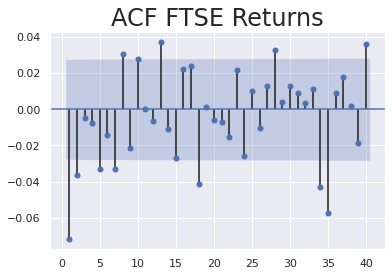

In [193]:
sgt.plot_acf(df_train.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

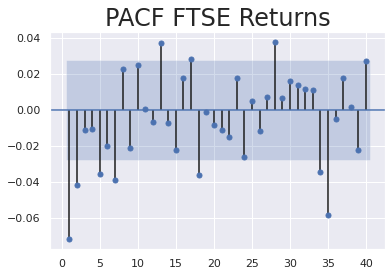

In [194]:
sgt.plot_pacf(df_train.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

In [ ]:
model_ret_ar_1 = ARMA(df_train.returns, order = (1,0))

In [ ]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [ ]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 05 Sep 2019   AIC                          15865.497
Time:                        10:14:38   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## Analysing the Residuals

In [181]:
df_train['res_price'] = results_ar_7.resid

In [182]:
df_train.res_price.mean()

0.020588582953607864

In [183]:
df_train.res_price.var()

318.606852661857

In [184]:
sts.adfuller(df_train.res_price)

(-16.115450759462192,
 4.961516986470881e-29,
 17,
 5003,
 {'1%': -3.4316577470238654,
  '5%': -2.862117882848672,
  '10%': -2.5670776077279878},
 39904.51951200849)

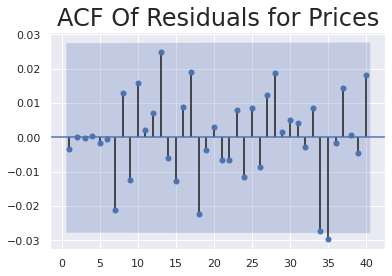

In [185]:
sgt.plot_acf(df_train.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

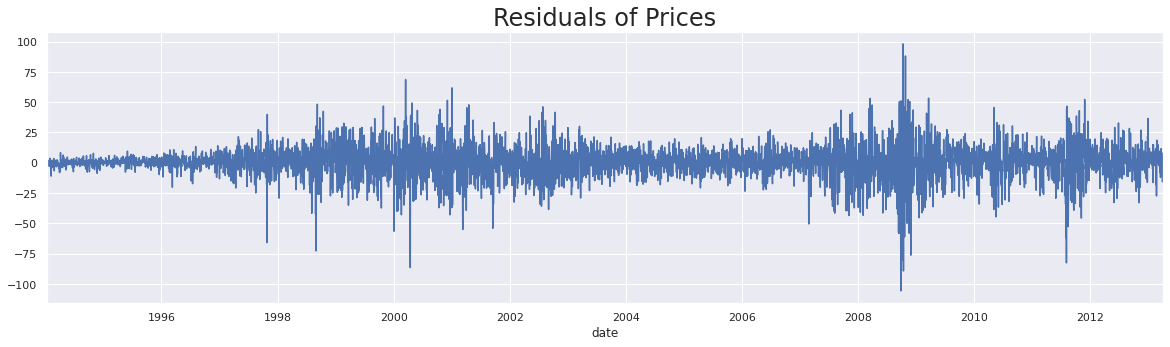

In [186]:
df_train.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()